In [1]:
import pandas as pd
from itertools import combinations
import itertools
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from random import randrange
import matplotlib
import seaborn as sns
from itertools import permutations

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.kernel_ridge import KernelRidge

import torch
import torch.nn as nn
import torch.utils.data as data_utils

## Loading data 

In [2]:
#loading the data
x_train  = pd.read_csv("split_1_train_X_Tesla_Cells_20220428.csv")
x_test  = pd.read_csv("split_1_test_X_Tesla_Cells_20220428.csv")
y_train  = pd.read_csv("split_1_train_y_Tesla_Cells_20220428.csv")
y_test  = pd.read_csv("split_1_test_y_Tesla_Cells_20220428.csv")

#removing column of filenames
x_train = x_train.drop('filename', axis = 1)
x_test = x_test.drop('filename', axis = 1)
y_test = y_test.drop('filename', axis = 1)
y_train = y_train.drop('filename', axis = 1)

#using log(labels)
train_labels= y_train["rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties"].tolist()
test_labels= y_test["rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties"].tolist()

#### PCA on data

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [5]:
pca = PCA(n_components = 22)
pca_x_train = pca.fit_transform(scaled_x_train)
pca_x_test = pca.transform(scaled_x_test)

## Comparing Models

#### Linear regression

['Linear_Regression'] [[0.0000000e+00 0.0000000e+00 1.5020245e+04 1.7560000e+00 1.9795210e+03
  3.9825160e+03 8.9700000e-01]]


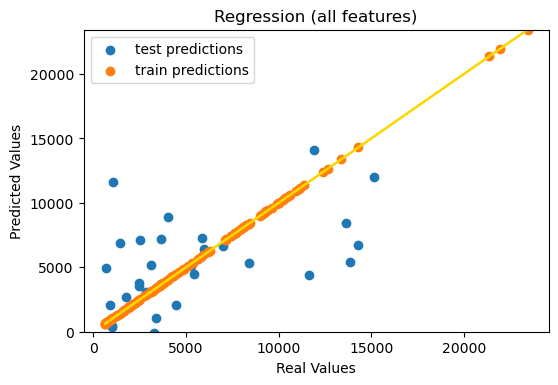

In [6]:
#without PCA
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
train_predictions = lm.predict(x_train)
predictions = lm.predict(x_test)

#with PCA
lm2 = linear_model.LinearRegression()
lm2.fit(pca_x_train, y_train)
pca_train_predictions = lm2.predict(pca_x_train)
pca_predictions = lm2.predict(pca_x_test)

fig = plt.subplots(dpi = 100)
plt.scatter(y_test, predictions, label = 'test predictions')
plt.scatter(y_train, train_predictions, label = 'train predictions')
plt.plot(y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'], y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'],color="gold")
plt.ylim(0, y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'].max())
plt.ylabel('Predicted Values')
plt.xlabel('Real Values')
plt.title("Regression (all features)")
plt.legend(loc = 'best')

train_RMSE = round(mean_squared_error(train_predictions,y_train)**0.5,3)
RMSE = round(mean_squared_error(predictions, y_test)**0.5,3)
train_MAPE = round(mean_absolute_percentage_error(train_predictions, y_train),3)
MAPE = round(mean_absolute_percentage_error(predictions, y_test),3)
                  
pca_train_RMSE = round(mean_squared_error(pca_train_predictions,y_train)**0.5,3)
pca_RMSE = round(mean_squared_error(pca_predictions, y_test)**0.5,3)
pca_MAPE = round(mean_absolute_percentage_error(pca_predictions, y_test),3)

models = ['Linear_Regression']
results = np.array([train_RMSE,train_MAPE,RMSE,MAPE, pca_train_RMSE,pca_RMSE,pca_MAPE])
results= results.reshape(1,results.shape[0])
print(models,results)

#### Lasso

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127835335.48195481, tolerance: 271627.153674661
  positive)


['Linear_Regression', 'Lasso']
[[0.0000000e+00 0.0000000e+00 1.5020245e+04 1.7560000e+00 1.9795210e+03
  3.9825160e+03 8.9700000e-01]
 [1.1845510e+03 3.1400000e-01 3.3206250e+03 6.5800000e-01 1.9795220e+03
  3.9814540e+03 8.9600000e-01]]


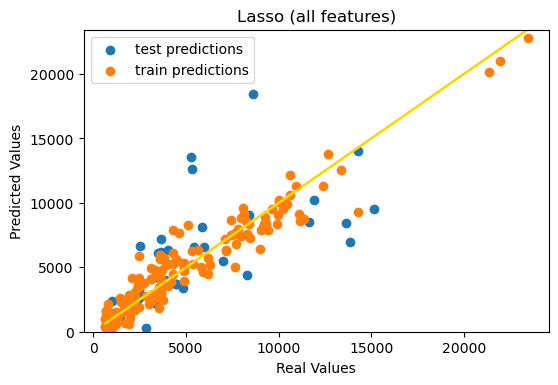

In [7]:
#without PCA
lm = linear_model.Lasso()
lm.fit(x_train, y_train)
train_predictions = lm.predict(x_train)
predictions = lm.predict(x_test)

#with PCA
lm2 = linear_model.Lasso()
lm2.fit(pca_x_train, y_train)
pca_train_predictions = lm2.predict(pca_x_train)
pca_predictions = lm2.predict(pca_x_test)

fig = plt.subplots(dpi = 100)
plt.scatter(y_test, predictions, label = 'test predictions')
plt.scatter(y_train, train_predictions, label = 'train predictions')
plt.plot(y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'], y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'],color="gold")
plt.ylim(0, y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'].max())
plt.ylabel('Predicted Values')
plt.xlabel('Real Values')
plt.title("Lasso (all features)")
plt.legend(loc = 'best')

train_RMSE = round(mean_squared_error(train_predictions,y_train)**0.5,3)
RMSE = round(mean_squared_error(predictions, y_test)**0.5,3)
train_MAPE = round(mean_absolute_percentage_error(train_predictions, y_train),3)
MAPE = round(mean_absolute_percentage_error(predictions, y_test),3)  

pca_train_RMSE = round(mean_squared_error(pca_train_predictions,y_train)**0.5,3)
pca_RMSE = round(mean_squared_error(pca_predictions, y_test)**0.5,3)
pca_MAPE = round(mean_absolute_percentage_error(pca_predictions, y_test),3)

models.append('Lasso')
results = np.append(results,[[train_RMSE,train_MAPE,RMSE,MAPE, pca_train_RMSE,pca_RMSE,pca_MAPE]],axis=0)
print(models)
print(results)

#### RF

['Linear_Regression', 'Lasso', 'Random Forest', 'Kernel RR', 'Random Forest']
[[0.0000000e+00 0.0000000e+00 1.5020245e+04 1.7560000e+00 1.9795210e+03
  3.9825160e+03 8.9700000e-01]
 [1.1845510e+03 3.1400000e-01 3.3206250e+03 6.5800000e-01 1.9795220e+03
  3.9814540e+03 8.9600000e-01]
 [9.5662100e+02 1.4300000e-01 2.9858420e+03 3.2500000e-01 1.8361460e+03
  3.2341240e+03 4.6200000e-01]
 [1.3933940e+03 1.9700000e-01 2.4294760e+03 3.2200000e-01 6.8229300e+02
  3.6868620e+03 9.8455000e+01]
 [9.5662100e+02 1.4300000e-01 2.9858420e+03 3.2500000e-01 1.8361460e+03
  3.2341240e+03 4.6200000e-01]]


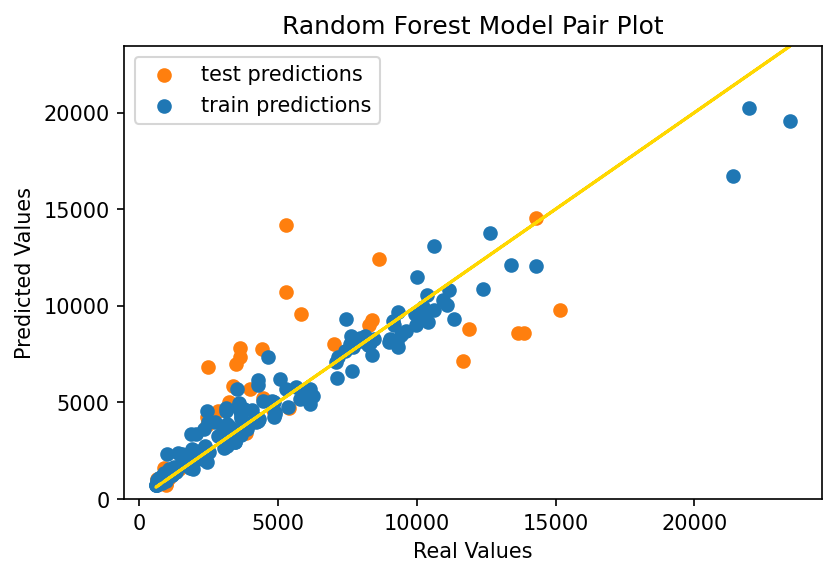

In [17]:
#without PCA
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

RF = RandomForestRegressor(n_estimators= 50, max_depth=6, random_state=2)
RF.fit(x_train, y_train)
train_predictions = RF.predict(x_train)
predictions = RF.predict(x_test)

#with PCA
RF2 = RandomForestRegressor(max_depth=3, random_state=1)
RF2.fit(pca_x_train, y_train)
pca_train_predictions = RF2.predict(pca_x_train)
pca_predictions = RF2.predict(pca_x_test)

fig = plt.subplots(dpi = 150)
plt.scatter(y_test, predictions, label = 'test predictions',color='tab:orange')
plt.scatter(y_train, train_predictions, label = 'train predictions',color='tab:blue')
plt.plot(y_train, y_train,color="gold")
plt.ylim(0, y_train.max())
plt.ylabel('Predicted Values')
plt.xlabel('Real Values')
plt.title("Random Forest Model Pair Plot")
plt.legend(loc = 'best')

train_RMSE = round(mean_squared_error(train_predictions,y_train)**0.5,3)
RMSE = round(mean_squared_error(predictions, y_test)**0.5,3)
train_MAPE = round(mean_absolute_percentage_error(train_predictions, y_train),3)
MAPE = round(mean_absolute_percentage_error(predictions, y_test),3)
                  
pca_train_RMSE = round(mean_squared_error(pca_train_predictions,y_train)**0.5,3)
pca_RMSE = round(mean_squared_error(pca_predictions, y_test)**0.5,3)
pca_MAPE = round(mean_absolute_percentage_error(pca_predictions, y_test),3)

models.append('Random Forest')
results = np.append(results,[[train_RMSE,train_MAPE,RMSE,MAPE, pca_train_RMSE,pca_RMSE,pca_MAPE]],axis=0)
print(models)
print(results)

plt.savefig('RFPP.png')

#### Kernel

['Linear_Regression', 'Lasso', 'Random Forest', 'Kernel RR']
[[0.0000000e+00 0.0000000e+00 1.5020245e+04 1.7560000e+00 1.9795210e+03
  3.9825160e+03 8.9700000e-01]
 [1.1845510e+03 3.1400000e-01 3.3206250e+03 6.5800000e-01 1.9795220e+03
  3.9814540e+03 8.9600000e-01]
 [9.5662100e+02 1.4300000e-01 2.9858420e+03 3.2500000e-01 1.8361460e+03
  3.2341240e+03 4.6200000e-01]
 [1.3933940e+03 1.9700000e-01 2.4294760e+03 3.2200000e-01 6.8229300e+02
  3.6868620e+03 9.8455000e+01]]


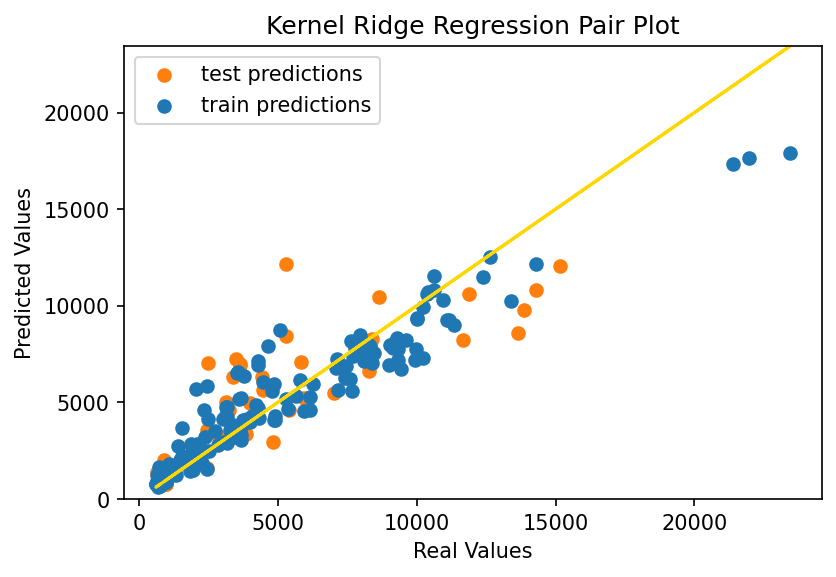

In [9]:
#without PCA
rng = np.random.RandomState(0)
krr = KernelRidge(alpha=0.2, kernel = 'laplacian')
krr.fit(x_train, y_train)
train_predictions = krr.predict(x_train)
predictions = krr.predict(x_test)

#with PCA
krr2 = KernelRidge(alpha=0.2, kernel = 'laplacian')
krr2.fit(pca_x_train, y_train)
pca_train_predictions = krr2.predict(pca_x_train)
pca_predictions = krr2.predict(pca_x_test)

fig = plt.subplots(dpi = 150)
plt.scatter(y_test, predictions, label = 'test predictions',color='tab:orange')
plt.scatter(y_train, train_predictions, label = 'train predictions',color='tab:blue')
plt.plot(y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'], y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'],color="gold")
plt.ylim(0, y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'].max())
plt.ylabel('Predicted Values')
plt.xlabel('Real Values')
plt.title("Kernel Ridge Regression Pair Plot")
plt.legend(loc = 'best')

train_RMSE = round(mean_squared_error(train_predictions,y_train)**0.5,3)
RMSE = round(mean_squared_error(predictions, y_test)**0.5,3)
train_MAPE = round(mean_absolute_percentage_error(train_predictions, y_train),3)
MAPE = round(mean_absolute_percentage_error(predictions, y_test),3)

pca_train_RMSE = round(mean_squared_error(pca_train_predictions,y_train)**0.5,3)
pca_RMSE = round(mean_squared_error(pca_predictions, y_test)**0.5,3)
pca_MAPE = round(mean_absolute_percentage_error(pca_predictions, y_test),3)

models.append('Kernel RR')
results = np.append(results,[[train_RMSE,train_MAPE,RMSE,MAPE, pca_train_RMSE,pca_RMSE,pca_MAPE]],axis=0)
print(models)
print(results)

plt.savefig('KernelPP.png')

#### Neural Network in Pytorch

In [10]:
# X= torch.tensor(x_train.values).float()
# Y=torch.tensor(y_train.values).float()
X= torch.tensor(pca_x_train).float()
Y=torch.tensor(y_train.values).float()
X_test= torch.tensor(pca_x_test).float()
Y_test=torch.tensor(y_test.values).float()

input_size = X.shape[1]
output_size=1
hidden_sizes=[400,10]
hidden_size=200

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
#                       nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size))

# model = nn.Sequential(nn.Linear(input_size, hidden_size),
#                       nn.Sigmoid(),
#                       nn.Linear(hidden_size,output_size))



In [19]:
# Training the NN
criterion = nn.MSELoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=0.1)
num_epochs = 2000
for e in range(num_epochs):
    # Training pass

    output = model(X)
    loss = criterion(output, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e % 500 ==0 and e !=0):
        print(loss)

tensor(17639328., grad_fn=<MseLossBackward>)
tensor(17639688., grad_fn=<MseLossBackward>)
tensor(17640096., grad_fn=<MseLossBackward>)


error for Linear Regression is 2429.476
error for pca_Linear Regression is 3841.654
['Linear_Regression', 'Lasso', 'Random Forest', 'Kernel RR']
[[0.0000000e+00 0.0000000e+00 1.5020245e+04 1.7560000e+00 1.9795210e+03
  3.9825160e+03 8.9700000e-01]
 [1.1845510e+03 3.1400000e-01 3.3206250e+03 6.5800000e-01 1.9795220e+03
  3.9814540e+03 8.9600000e-01]
 [9.5662100e+02 1.4300000e-01 2.9858420e+03 3.2500000e-01 1.8361460e+03
  3.2341240e+03 4.6200000e-01]
 [1.3933940e+03 1.9700000e-01 2.4294760e+03 3.2200000e-01 6.8229300e+02
  3.6868620e+03 9.8455000e+01]]


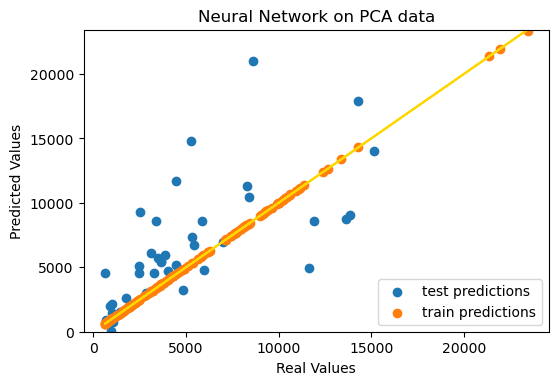

In [12]:
#making prediction with NN
pca_train_predictions = model(X).squeeze().detach().numpy()
pca_predictions = model(X_test).squeeze().detach().numpy()

fig = plt.subplots(dpi = 100)
plt.scatter(y_test, pca_predictions, label = 'test predictions')
plt.scatter(y_train, pca_train_predictions, label = 'train predictions')
plt.plot(y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'], y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'],color="gold")
plt.ylim(0, y_train['rpt_0.2Cdischarge_capacity0.8_real_regular_throughput::DiagnosticProperties'].max())
plt.ylabel('Predicted Values')
plt.xlabel('Real Values')
plt.title("Neural Network on PCA data")
plt.legend(loc = 'best')

train_RMSE = round(mean_squared_error(train_predictions,y_train)**0.5,3)
RMSE = round(mean_squared_error(predictions, y_test)**0.5,3)
MAPE = round(mean_absolute_percentage_error(predictions, y_test),3)
print(f'error for Linear Regression is {RMSE}')
                  
pca_train_RMSE = round(mean_squared_error(pca_train_predictions,y_train)**0.5,3)
pca_RMSE = round(mean_squared_error(pca_predictions, y_test)**0.5,3)
pca_MAPE = round(mean_absolute_percentage_error(pca_predictions, y_test),3)
print(f'error for pca_Linear Regression is {pca_RMSE}')

# models.append('Neural Network')
# results = np.append(results,[[train_RMSE,RMSE,MAPE, pca_train_RMSE,pca_RMSE,pca_MAPE]],axis=0)
print(models)
print(results)

## Plotting models comparison

In [137]:
## Results from NN in TensorFlow were better (cf file "prediction_draft", coding in an enviromnent with Tensorflow, unlike this ipynb)
## Train RMSE, train_MAPE, test RMSE, test MAPE and pca_train_RMSE are reported below. Results obtained with 2 layers, 50 epochs training.
train_RMSE = 1684
train_MAPE = 0.257
RMSE = 5486.4
MAPE = 0.39769

pca_train_RMSE = 0 #set to 0 to respect the dimension of the np.array results. 
pca_RMSE =0 #set to 0 to respect the dimension of the np.array results. 
pca_MAPE = 0.436

models.append('Neural Network')
results = np.append(results,[[train_RMSE,train_MAPE,RMSE,MAPE, pca_train_RMSE,pca_RMSE,pca_MAPE]],axis=0)

In [138]:
results[:,1].shape
bar1= np.arange(len(models))
models

['Linear_Regression', 'Lasso', 'Random Forest', 'Kernel RR', 'Neural Network']

In [139]:
results[:,3]*100

array([175.6  ,  65.8  ,  32.5  ,  32.2  ,  39.769])

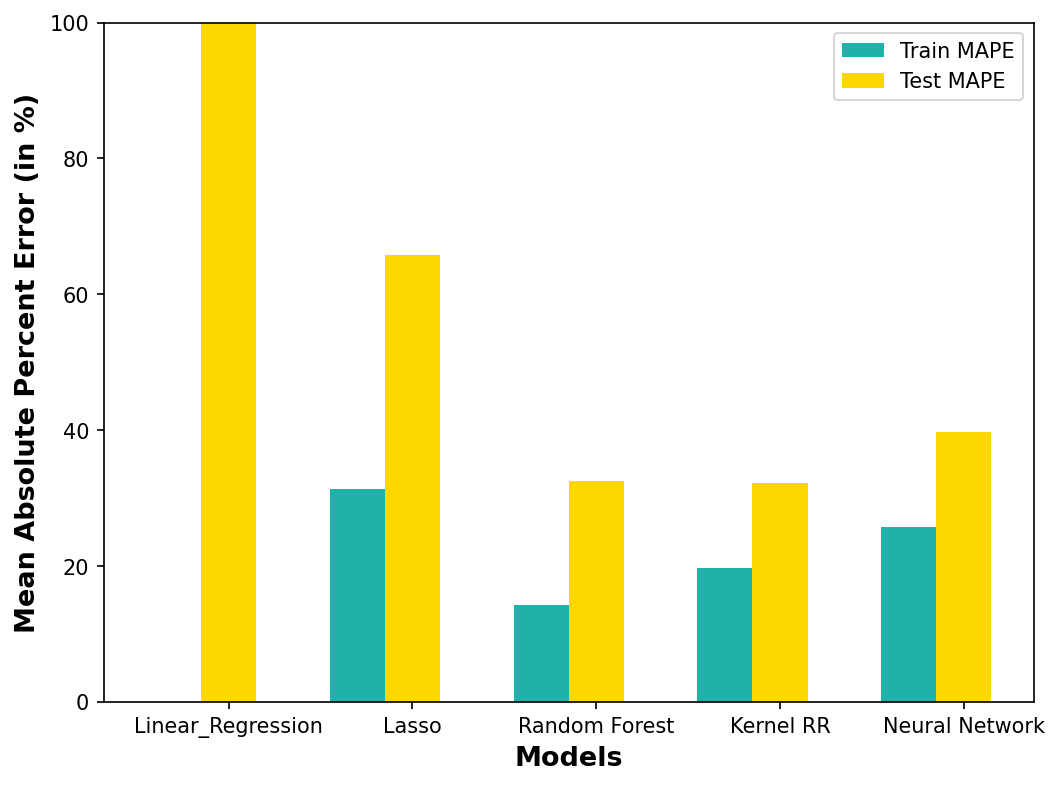

In [140]:
all_train_MAPE= results[:,1]*100
all_test_MAPE = results[:,3]*100
chiffres=[1,2,3,4,5]
barwidth = 0.3
bar1= np.arange(len(models))
bar2 = [x + barwidth for x in bar1]
bar3 = [x + barwidth for x in bar2]


fig = plt.subplots(figsize=(8,6),dpi=150)
# ax = fig.add_axes([0,0,1,1])
plt.ylim([0,100])
plt.bar(bar1,all_train_MAPE,color='lightseagreen',width=barwidth,label='Train MAPE')
plt.bar(bar2,all_test_MAPE,color='gold',width=barwidth,label='Test MAPE')

plt.xlabel('Models',fontweight = 'bold',fontsize=13)
plt.ylabel('Mean Absolute Percent Error (in %)',fontweight= 'bold',fontsize=13)
plt.xticks([x + barwidth for x in range(len(models))],models)
plt.xticks(fontsize=10)
# plt.ylim(0,5000)

plt.legend()
plt.savefig('Models_comparison.png')


#### Looking into differences between PCA and non-PCA data.

In [148]:
all_MAPE = results[:,3]*100
PCA_MAPE = results[:,-1]*100
#dropping Kernel data that doesn't work for PCA
all_MAPE = np.delete(all_MAPE,[0,3])
PCA_MAPE = np.delete(PCA_MAPE,[0,3])
print(PCA_MAPE - all_MAPE)
print(np.mean(abs(PCA_MAPE - all_MAPE)))

[23.8   13.7    3.831]
13.777000000000006


#### (first implementation of NN, doesn't work well)

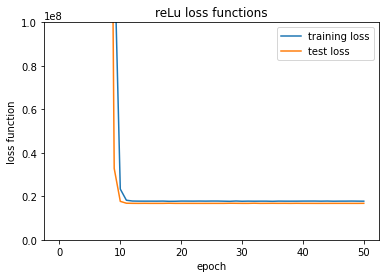

KeyboardInterrupt: 

In [14]:
input_size = pca_x_train.shape[1]
hidden_sizes=[25,6,3]
output_size=1
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      )


batch_size = 2
num_epochs = 150
learning_rate=1E-2

num_train=X.shape[0]
num_test=X_test.shape[0]
train_index = torch.randperm(num_train)
test_index = torch.randperm(num_test)

num_train_batch = (num_train + batch_size -1) // batch_size
num_test_batch = (num_test + batch_size -1) // batch_size


all_train_loss=[]
all_test_loss=[]

for epoch in range(num_epochs):
    #let's shuffle our training indices
    train_order=train_index[torch.randperm(num_train)]
    epoch_train_loss = 0
    epoch_test_loss =0
    
    for batch in range(num_train_batch):
        #let's create our minibatch training set and labels:
        indices=train_order[batch * batch_size:(batch+1)*batch_size]
        x_batch =X[indices]
        y_batch =Y[indices]
        #let's now train our network:
        y_pred =model(x_batch)
        loss=((y_pred - y_batch) **2).mean()
        model.zero_grad() #always have to zero grad if you don't want to add gradients
        loss.backward()
        #let's encode the optimizer.step()
        for p in model.parameters():
            with torch.no_grad():
                p.copy_(p - learning_rate * p.grad)
        epoch_train_loss += loss.item()
        
    for batch in range(num_test_batch):
        #compute loss on test dataset
        test_indices=test_index[batch * batch_size:(batch + 1)*batch_size] #no need to randomize
        x_batch =X_test[test_indices]
        y_batch =Y_test[test_indices]
        with torch.no_grad():
            y_pred= model(x_batch)
            loss=((y_pred - y_batch) **2).mean()
        epoch_test_loss += loss.item()
    
    all_train_loss.append(epoch_train_loss/num_train_batch)
    all_test_loss.append(epoch_test_loss/num_test_batch)
    
    #plot train and test loss
    if (epoch % 50 ==0 and epoch !=0):
        plt.plot(all_train_loss, label='training loss')
        plt.plot(all_test_loss, label='test loss')
        plt.xlabel("epoch")
        plt.ylabel("loss function")
        plt.title('reLu loss functions')
        plt.legend()
        plt.ylim(0,10**8)
        plt.show()